# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve? People's lives have become more fast-paced and they deal with a significant number of distractions daily. This has led to the situation where people are not able to dedicate as much time to exploring artistic pursuit (i.e. discovering new music they may enjoy). Therefore, in solving this problem we will give people back their ability to find new art that they will enjoy (even if they have limited time).

### **The objective:**

 - What is the intended goal? 
    - To Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.
    - This will keep users on the app for longer periods of time (by recommending them songs they will listen to), so that the company (Spotify) can increase their revenue

### **The key questions:**

- What are the key questions that need to be answered?
    - what types of music does the user like?
    - have they used the service before?
    - does ther user share any interests with other users? if so, how much?
    - how many times will a song get played?


### **The problem formulation**:

- What is it that we are trying to solve using data science? 
    - we want to extract meaningful insight from our data in order to build the best recommendation system that can recommend 10 songs that the user is most likely to listen to

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive

In [110]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd
from sklearn import preprocessing

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict
# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
count_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# Display info of song_df
song_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [8]:
# list all the rows that hae null values
song_df.loc[song_df.isna().any(axis=1)]

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
64788,SOESMJQ12A6D4FE563,Aztec Two-Step,NaN,Meshuggah,1994
110154,SOZGJGY12A8159E898,NaN,Frailty,The Duskfall,2002
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
304580,SOFIWTV12A6D4F92C3,Sickening,NaN,Meshuggah,1994


In [9]:
# because there are so few null values in the song DataFrame, I choose to remove the rows with null values
song_df.dropna(axis=0, inplace=True)
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999976 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      999976 non-null  object
 1   title        999976 non-null  object
 2   release      999976 non-null  object
 3   artist_name  999976 non-null  object
 4   year         999976 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 45.8+ MB


#### **Observations and Insights:**
- the count dataframe has 2000000 rows and 4 columns
    - columns **Unnamed:0** and **play_count** are int64 type, while **user_id** and **song_id** are object type
    - there appears to be no missing values in the count dataframe
- the song data frame has 1000000 rows and 5 columns
    - the **year** column has the int64 data type, while the other 4 columns have the object data type
    - there appears to be 17 missing values in the title column and 7 missing values in the release column
    - I chose to drop the null rows since there are so few of them compared to the total dataset


In [10]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df,song_df.drop_duplicates(['song_id']),how='left', on='song_id')
# Drop the column 'Unnamed: 0'
merged_df.drop(labels='Unnamed: 0',axis=1, inplace=True)
## Name the obtained dataframe as "df"
df = merged_df
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [11]:
# Apply label encoding for "user_id" and "song_id"
label_encoder = preprocessing.LabelEncoder()
df['user_id']= label_encoder.fit_transform(df['user_id'])
df['song_id']= label_encoder.fit_transform(df['song_id'])
df

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,64590,3893,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [12]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [13]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [14]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [15]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [16]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [17]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [18]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,117876.0,37986.496954,22041.887894,11.0,19275.0,37049.0,57152.0,76347.0
song_id,117876.0,4896.602608,2916.276544,21.0,2220.0,5023.0,7522.0,9989.0
play_count,117876.0,1.700058,1.089517,1.0,1.0,1.0,2.0,5.0
year,117876.0,1652.819683,761.726035,0.0,1994.0,2005.0,2008.0,2010.0


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [19]:
# Display total number of unique user_id
df_final.user_id.nunique()

3155

Total number of unique song id

In [20]:
# Display total number of unique song_id
df_final.song_id.nunique()

563

Total number of unique artists

In [21]:
# Display total number of unique artists
df_final.artist_name.nunique()

232

#### **Observations and Insights:**
- There are **3155** unique users in the dataframe and **563** unique songs. 
    - If we calculate every combination of user-song interaction we end up with **3155 * 563 = 1,776,265** interactions.
    - However, the dataframe on has **117,876** rows. 
    - So there are still **1,776,265 - 117,876 = 1,658,389** possible interactions that are unaccounted for.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [22]:
df_final.song_id.value_counts()

song_id
8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: count, Length: 563, dtype: int64

Most interacted users

In [23]:
df_final.user_id.value_counts()

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: count, Length: 3155, dtype: int64

#### **Observations and Insights:**
- the most popular song has been play **751** times. Meaning that a max of **751** users have listened to this song. So, there are still **3155-751= 2,404** who haven't interacted with the song.
- On the user side, the most frequent user has listened to **243**. Which means that they still have **563-243 = 320** songs left to discover


Songs released on yearly basis

In [24]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
song_df.groupby('year')['song_id'].count()

year
0       484404
1922         6
1924         5
1925         7
1926        19
         ...  
2007     39414
2008     34770
2009     31051
2010      9397
2011         1
Name: song_id, Length: 90, dtype: int64

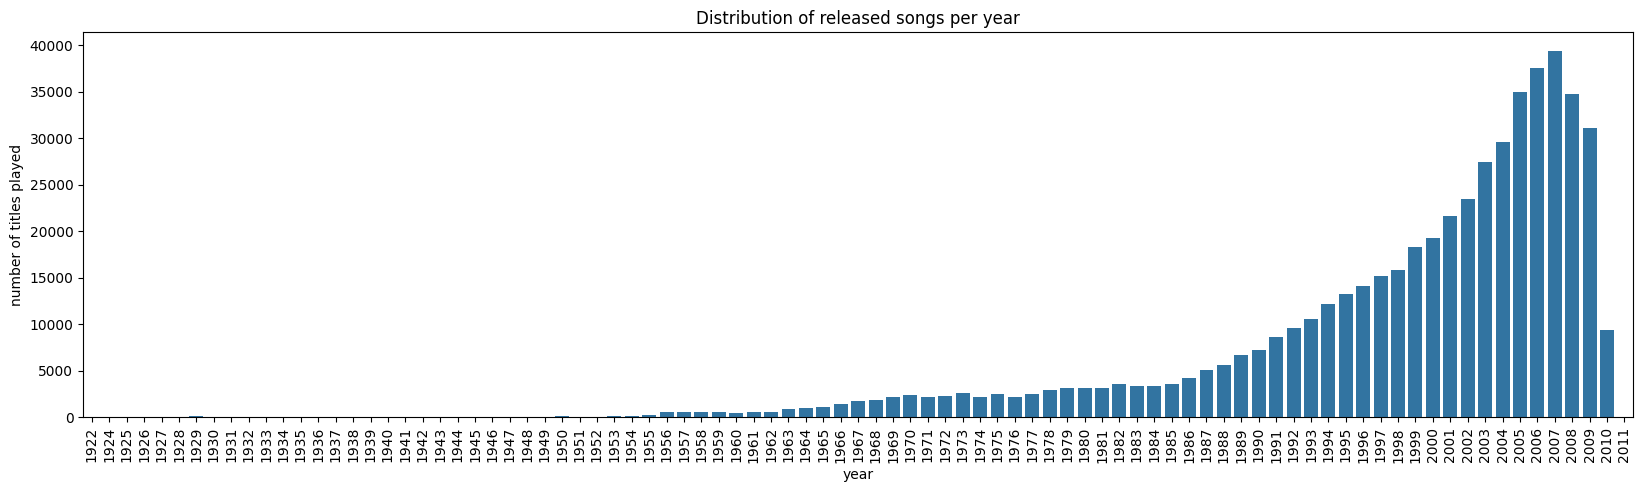

In [121]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize = (20, 5))
sns.countplot(data=song_df.loc[song_df['year'] != 0 ],x='year')

# Set the x label of the plot
plt.xlabel('year')
plt.xticks(rotation=90);
# Set the y label of the plot
plt.ylabel("number of titles played")

# Show the plot
plt.title("Distribution of released songs per year")
plt.show()

In [27]:
df_final.play_count.value_counts()

play_count
1    72473
2    23890
3    10774
4     5874
5     4865
Name: count, dtype: int64

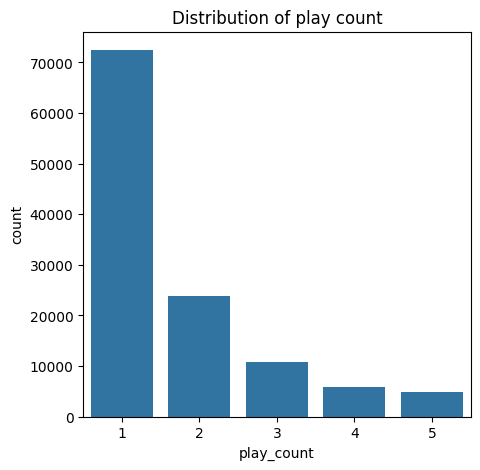

In [344]:
# Create a barplot plot for Distribution of play count
# Set the figure size
plt.figure(figsize = (5, 5))
sns.countplot(data=df_final,x='play_count')

# Set the title
plt.title("Distribution of play count");


In [339]:
pd.DataFrame(df_final.groupby('year')['play_count'].sum())

,play_count
year,
0,37358
1969,415
1970,202
1971,240
1973,437
1974,1081
1975,349
1976,806
1978,179


In [341]:
df_final.play_count.sum()

200396

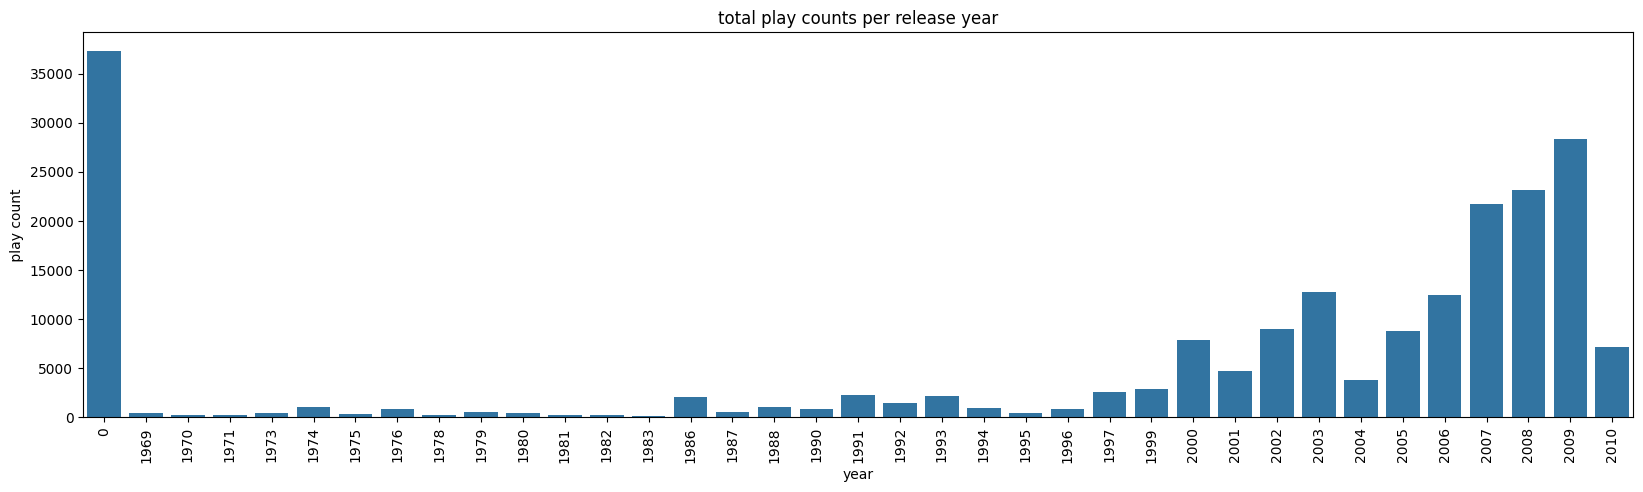

In [342]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize = (20, 5))
sns.barplot(data=pd.DataFrame(df_final.groupby('year')['play_count'].sum()),x='year', y='play_count')

# Set the x label of the plot
plt.xlabel('year')
plt.xticks(rotation=90);
# Set the y label of the plot
plt.ylabel(" play count ")

# Show the plot
plt.title("total play counts per release year")
plt.show()

#### **Observations and Insights:** #
- The songs graph has an exponential curve with an "elbow" at around 1986 and a peak at 2007.
    - Before 1956 the amount of songs released is practically zero
- Outside of the '0' year, the majority of songs plays come from years 2000-2010 [around 70%]
    - This could shows that people may be gravitating towards songs they grew up listening too (if they are in their teens to 30's). Futher proving that people are not exploring songs that they are less familiar with.
    - It can also be seen that there is a cutoff from songs before 1969. (these values may be hidden within the '0' column)
- there are **484404** songs with an unknown release year 
- Around **61.4%** of songs in the data frame have a play count of 1
- around **20%** of songs have their release year unknown

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [29]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby(['song_id'])['play_count'].mean()
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby(['song_id'])['play_count'].sum()

In [30]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count' : average_count, 'play_freq' : play_freq})
# Let us see the first five records of the final_play dataset
final_play.head(5)

,average_count,play_freq
song_id,,
21,1.622642,430
22,1.492424,197
52,1.729216,728
62,1.728070,197
93,1.452174,167


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [31]:
# Build the function to find top n songs
def find_top_n_songs(data, n, min_play):

    # Finding products with minimum number of interactions
    threshold = data.loc[data['play_freq'] > min_play]

    # Sorting values with respect to average count 
    sorted = threshold.sort_values(by='average_count',ascending=False)
    return sorted[0:n]

In [117]:
# Recommend top 10 songs using the function defined above
find_top_n_songs(final_play,10,100) # recommending the top 10 songs that have a minimum of 100 plays

,average_count,play_freq
song_id,,
7224,3.373832,361
8324,2.625000,252
6450,2.578431,263
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248
8483,2.235772,275
2220,2.220196,1583
657,2.218543,335


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [33]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

# !pip install surprise

In [34]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [183]:
def precision_recall_at_k(model, k=10, threshold=1.5, testing_set= testset):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [180]:
def load_data(dataframe= df_final ,test_size= 0.4, random_state = 42):
    # Instantiating Reader scale with expected rating scale
    #use rating scale (0, 5)
    reader = Reader(rating_scale=(0,5))
    # Loading the dataset
    # Take only "user_id","song_id", and "play_count"
    data = Dataset.load_from_df(dataframe[['user_id', 'song_id', 'play_count']], reader)
    # Splitting the data into train and test dataset
    # Take test_size = 0.4, random_state = 42
    trainset, testset = train_test_split(data=data, test_size= test_size, random_state= random_state)
    return data, trainset, testset

In [181]:
data, trainset, testset = load_data()

**Think About It:** How changing the test size would change the results and outputs?

In [187]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}


# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset=trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
 # Use sim_user_user model
precision_recall_at_k(model=sim_user_user)

RMSE: 1.0878
Precision:  0.405
Recall:  0.591
F_1 score:  0.481


**Observations and Insights:**
- The RMSE [**1.0878**] is quite low given the dependent variable (**play_count**) range of (0 to 5). So, our model fits the data well
- At **40.5%**, The precision on is very low. Showing that the out of 10 recommendations, around 4 are relevant
- At **59.1%**, the recall is solid. This shows that the models recommendations captures just over half of all relevant songs to the user.
- As a result the F-1 score is just over **48%**


In [38]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
user = df_final.head(1).user_id.values[0]
song = df_final.head(1).song_id.values[0]
play = df_final.head(1).play_count.values[0]

sim_user_user.predict(uid=user,iid=song,r_ui=play,verbose=True)

user: 6958       item: 447        r_ui = 1.00   est = 1.12   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=1, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [39]:
df_final.head(1)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000


In [40]:
# This code is to find users that did not interact with product 447
users_iteracted =  df_final.groupby('song_id')['user_id'].unique()[447]

# returns the first user that did not interact with product 447
all_users = set(df_final['user_id'])

non_listener = list(all_users.difference(users_iteracted))[:1][0]

In [41]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

sim_user_user.predict(uid=non_listener,iid=song,verbose=True)

user: 8194       item: 447        r_ui = None   est = 1.33   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=447, r_ui=None, est=1.3267473545779291, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **447** the model predicted a play count of **1.12** against the actual play count of **1**. 
    - There is a **12%** difference the prediction and actual value, which is solid.
- for user **8194** and item **447** the model predicted a play count of **1.33**


Now, let's try to tune the model and see if we can improve the model performance.

In [42]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 
              'min_k': [6,7,8,9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3, n_jobs= -1)
# Fitting the data
 # Use entire data for GridSearch
grid_search.fit(data=data)
# Best RMSE score
print(grid_search.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done 

In [43]:
# Train the best model found in above gridsearch

sim_options_opt = {'name': 'pearson_baseline', 
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_opt = KNNBasic(k=30, min_k=9, sim_options=sim_options_opt, verbose=False, random_state = 2)
# Training the algorithm on the trainset
sim_user_user_opt.fit(trainset=trainset)
# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(model=sim_user_user_opt)

RMSE: 1.0521
Precision:  0.43
Recall:  0.637
F_1 score:  0.513


**Observations and Insights:**
- After optimizing with the pearson_baseline, The RMSE improved a bit to **1.0521**
- the Precision went up to **43%**. i.e. around 4.3 out of 10 recommendations are relevant
- the recall went up **~4%** to **63.7%**.
- the F-1 score went up to **51.3%** 

In [44]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_opt.predict(uid=6958, iid=1671, r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [45]:
# This code is to find songs that did not interact with product 6958
songs_iteracted =  df_final.groupby('user_id')['song_id'].unique()[6958]

# returns the first song that 6958 did not interact with
all_songs = set(df_final['song_id'])

un_heard = list(all_songs.difference(songs_iteracted))[:5]
un_heard

[2048, 6148, 21, 22, 6175]

In [118]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_opt.predict(uid=6958, iid=un_heard[0], verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.47   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4708539906502014, details={'actual_k': 22, 'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **1671** the model predicted a play count of **1.96** against the actual play count of **2**. 
    - There is a **2%** difference the prediction and actual value, which is much better than the unoptimized model.
- for song **2048** the model predicted a play count of **1.47**, which is very close to the average play count of the dataframe.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [47]:
# Use inner id 0
sim_user_user_opt.get_neighbors(iid=0,k=5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [48]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    rec_songs = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_ids in non_interacted_products:

        # Predicting the play_counts for those non played song ids by this user
        est_play_count = algo.predict(user_id,song_ids).est

        # Appending the predicted play_counts
        rec_songs.append((song_ids, est_play_count))

    # Sorting the predicted play_counts in descending order
    rec_songs.sort(key=lambda x: x[1], reverse=True)

    # Returing top n highest predicted play_count songs for this user
    return rec_songs[:top_n]

In [49]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
top_5_reccomendations = get_recommendations(df_final, 6958, 5, sim_user_user_opt)
top_5_reccomendations

[(5531, 2.5533349782058683),
 (317, 2.518269003610337),
 (4954, 2.4067760718565427),
 (8635, 2.396605826987296),
 (5943, 2.3907230036433704)]

In [50]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
song_predict = pd.DataFrame(data=top_5_reccomendations,columns=['song_id','predicted_play_count'])
song_predict

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**
- The top 5 songs predicted by the optimized user-user model for user 6958 are [5531, 317, 4954, 8635, 5943].
     - their predicted play count for each song is [~2.55, ~2.51, ~2.4, ~2.397, ~2.391]. 
     - total estimated play count average is ~2.45.

### Correcting the play_counts and Ranking the above songs

In [143]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
    ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values(by='play_freq',ascending=False)[['average_count','play_freq']].reset_index()
  # Merge with the recommended songs to get predicted play_counts
    df_rec_songs = pd.DataFrame(recommendations,columns=['song_id','est_play_count'])
    merged_ranking = ranked_songs.merge(df_rec_songs, how='inner', on='song_id')
  # Rank the songs based on corrected play_counts
    merged_ranking['corrected_play_counts'] = merged_ranking['est_play_count'] - 1/np.sqrt(merged_ranking['play_freq'])
  # Sort the songs based on corrected play_counts
    return merged_ranking.sort_values(by='corrected_play_counts', ascending=False)

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [144]:
# Applying the ranking_songs function on the final_play data
ranking_songs(top_5_reccomendations,final_play)

,song_id,average_count,play_freq,est_play_count,corrected_play_counts
0,5531,2.309061,1427,2.553335,2.526863
1,317,2.034063,836,2.518269,2.483683
2,5943,1.962175,830,2.390723,2.356012
3,4954,1.846995,338,2.406776,2.352383
4,8635,1.670968,259,2.396606,2.334469


**Observations and Insights:**
- Both the corrected_play_counts and the play_freq ranks are inline with each other. 
- The total corrected average play count is ~2.41
    

### Item Item Similarity-based collaborative filtering recommendation systems

In [54]:
# Apply the item-item similarity collaborative filtering model with random_state = 3 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}


# KNN algorithm is used to find desired similar items
 # Use random_state = 3
sim_item_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 3)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset=trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
 # Use sim_item_item model
precision_recall_at_k(model=sim_item_item,k = 10)

RMSE: 1.0394
Precision:  0.311
Recall:  0.442
F_1 score:  0.365


**Observations and Insights:**
- The item-item RMSE (1.0394) is even better than the optimized user-user RMSE
- However, the precision [31.1%] is worse than user-user models
- The recall [44.2%] is also very low
- resulting in an F-1 score of 36.5%

In [55]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(uid=6958, iid=1671, r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [56]:
# This code is to find users that did not interact with product 1671
users_iteracted =  df_final.groupby('song_id')['user_id'].unique()[1671]

# returns the first user that did not interact with product 1671
all_users = set(df_final['user_id'])

non_listener = list(all_users.difference(users_iteracted))[:1][0]
non_listener

8194

In [57]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(uid=non_listener, iid=1671,verbose=True)

user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **1671** the model predicted a play count of **1.36** against the actual play count of **2**. 
    - There is a **32%** difference the prediction and actual value, which is worse than the unoptimized user-user model.
- for user **8194** and item **1671** the model predicted a play count of **1.65**

In [58]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40], 
              'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3, n_jobs= -1)

# Fitting the data
grid_search.fit(data=data)

# Find the best RMSE score
print(grid_search.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done 

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [59]:
# Apply the best model found in the grid search
sim_options_opt = {'name': 'pearson_baseline', 
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_opt = KNNBasic(k=30, min_k=6, sim_options=sim_options_opt, verbose=False, random_state = 2)
# Training the algorithm on the trainset
sim_item_item_opt.fit(trainset=trainset)
# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(model=sim_item_item_opt, k=30)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**
- After optimizing with the pearson_baseline, The RMSE improved a bit to **1.0328**
- the Precision went up to **40.8%**. i.e. around 4.1 out of 10 recommendations are relevant. 
- the recall went up **~4%** to **66.5%**. Which is better than the optimized user-user recall
- the F-1 score went up to **50.6%** 

In [60]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_opt.predict(uid=6958, iid=1671, r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [61]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_opt.predict(uid=6958, iid=3232,verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **1671** the model predicted a play count of **1.96** against the actual play count of **2**. 
    - Which is the same as the optimized user-user prediction
- for song **3232** the model predicted a play count of **1.28**, which is lower than the optimized user-user prediction

In [62]:
# Find five most similar items to the item with inner id 0
sim_item_item_opt.get_neighbors(iid=0,k=5)

[124, 523, 173, 205, 65]

In [63]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
top_5_item = get_recommendations(df_final,user_id=6958,top_n=5,algo=sim_item_item_opt)
top_5_item

[(2342, 2.653903109477312),
 (5101, 2.386577162060947),
 (139, 2.3137269182649587),
 (7519, 2.270863650991906),
 (8099, 2.2127017409877365)]

In [64]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
item_predict = pd.DataFrame(data=top_5_item,columns=['song_id','predicted_play_count'])
item_predict

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [65]:
# Applying the ranking_songs function
ranking_songs(top_5_item,final_play)

,song_id,play_freq,est_play_count,corrected_play_counts
4,2342,146,2.653903,2.571143
3,5101,192,2.386577,2.314408
2,139,207,2.313727,2.244222
1,7519,235,2.270864,2.205631
0,8099,465,2.212702,2.166328


**Observations and Insights:**
- Here we can see that the ranking of songs by corrected_play_counts is the reverse of play_freq ranking
- the total estimated play count average is ~2.37 and the corrected average is ~2.3

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [66]:
# Build baseline model using svd
svd = SVD(random_state = 5)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k and recall@k with k = 30
precision_recall_at_k(svd)

RMSE: 1.0257
Precision:  0.423
Recall:  0.55
F_1 score:  0.478


In [67]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3252555025631108, details={'was_impossible': False})

In [68]:
# This code is to find users that did not interact with product 3232
users_iteracted =  df_final.groupby('song_id')['user_id'].unique()[3232]

# returns the first user that did not interact with product 3232
all_users = set(df_final['user_id'])

non_listener = list(all_users.difference(users_iteracted))[:1][0]
non_listener

8194

In [69]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(uid=8194, iid=3232, verbose=True)

user: 8194       item: 3232       r_ui = None   est = 1.74   {'was_impossible': False}


Prediction(uid=8194, iid=3232, r_ui=None, est=1.7413787534339251, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [70]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 
              'lr_all': [0.005, 0.01, 0.015],
              'reg_all': [0.05, 0.1, 0.2]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data=data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.00381829261432
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [71]:
# Building the optimized SVD model using optimal hyperparameters
svd_opt = SVD(random_state = 6, n_epochs=30, lr_all=0.01, reg_all= 0.1)

# Training the algorithm on the train set
svd_opt.fit(trainset)

# Let us compute precision@k and recall@k with k = 30
precision_recall_at_k(svd_opt)

RMSE: 1.0083
Precision:  0.432
Recall:  0.537
F_1 score:  0.479


**Observations and Insights:**
- The SVD RMSEs are the better than all the collaborative filters, both the unoptimized [1.0257] and optimized [1.0091]
- the optimized precision went up to **43.1%**. This is about nearly equal to the optimized user-user model
- the recall [**53.5%**] went down compared to the unoptimized SVD [55%].
    - This should be alright since recall is not the main focus of the problem.
- the F-1 score went down slightly to **47.7%** 


In [72]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_opt.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4135008954359984, details={'was_impossible': False})

In [73]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_opt.predict(uid=6958, iid=3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4760600358387428, details={'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **1671** the optimized model predicted a play count of **1.43** against the actual play count of **2**. This is better than the unoptimized prediction.
    - There is a **28.5%** difference the prediction and actual value, which is the second worst prediction thus far.
- for user **6958** and item **3232** the model predicted a play count of **1.48**

In [74]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
top_svd = get_recommendations(df_final,user_id=6958, top_n=5,algo=svd_opt)
top_svd

[(5653, 2.5247524002612796),
 (6860, 2.161098194863486),
 (8831, 2.051992360141038),
 (6721, 2.0328365817649736),
 (7224, 2.022144170038102)]

In [150]:
# Ranking songs based on above recommendations
ranking_svd = ranking_songs(top_svd, final_play)
ranking_svd

,song_id,average_count,play_freq,est_play_count,corrected_play_counts
3,5653,2.296296,248,2.524752,2.461252
1,6860,2.171598,367,2.161098,2.108899
0,6721,1.771318,457,2.032837,1.986059
4,8831,1.962617,210,2.051992,1.982986
2,7224,3.373832,361,2.022144,1.969513


**Observations and Insights:**
- the song ranks from the optimized SVD model are a bit jumbled.
- the total estimated play count average is ~2.16 and the corrected average is ~2.1


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [76]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 6)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 30
precision_recall_at_k(clust_baseline)

RMSE: 1.0505
Precision:  0.401
Recall:  0.496
F_1 score:  0.443


In [77]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.04   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0442694046810574, details={'was_impossible': False})

In [78]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(uid=6958, iid=3232, r_ui=2, verbose=True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.21   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.2060166956050087, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [79]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 
              'n_cltr_i': [ 5, 6, 7, 8], 
              'n_epochs': [ 20, 30, 40]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0471345976123256
{'n_cltr_u': 3, 'n_cltr_i': 8, 'n_epochs': 30}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [80]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,n_cltr_i = 8, n_epochs = 30, random_state = 7)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 30
precision_recall_at_k(clust_tuned)

RMSE: 1.0532
Precision:  0.408
Recall:  0.491
F_1 score:  0.446


**Observations and Insights:**
- between the optimized and unoptimized cluster models The RMSE improved a bit to **1.0532**
- the Precision went up slightly to **40.8%**. Which is our main focus.
- the recall went down slightly to **49.1%**.
- the F-1 score went up to **44.6%**.
- By metrics alone, this model has the lowest precision of all optimized models.


In [81]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(uid=6958, iid=1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.10   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.103959826482742, details={'was_impossible': False})

In [82]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(uid=6958, iid=3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5506247709571823, details={'was_impossible': False})

**Observations and Insights:**
- for user **6958** and song **1671** the optimized model predicted a play count of **1.10** against the actual play count of **2**. This is better than the unoptimized prediction.
    - There is a **45%** difference the prediction and actual value, which is the worst prediction thus far.
- for user **6958** and item **3232** the model predicted a play count of **1.55**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [83]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
top_5_cluster = get_recommendations(df_final,user_id=6958, top_n=5, algo=clust_tuned)
top_5_cluster

[(7224, 3.4669113310897224),
 (9942, 2.5871534078535383),
 (1664, 2.4638894377810576),
 (352, 2.3533467650581317),
 (7496, 2.2971045678046984)]

### Correcting the play_count and Ranking the above songs

In [84]:
# Ranking songs based on the above recommendations
ranking_songs(top_5_cluster,final_play)

,song_id,play_freq,est_play_count,corrected_play_counts
4,7224,361,3.466911,3.414280
3,9942,373,2.587153,2.535375
1,1664,845,2.463889,2.429488
0,352,1634,2.353347,2.328608
2,7496,628,2.297105,2.257200


**Observations and Insights:**
- The rankings here are jumbled similarly to the SVD rankings, despite the estimated values being higher here.
- the total estimated play count average is ~2.63 and the corrected average is ~2.59

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [85]:
df_small = df_final

In [86]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small["title"] + ' ' + df_small[ "release"] + ' ' + df_small["artist_name"]
df_small

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse
...,...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0,Half Of My Heart Battle Studies John Mayer
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,Bitter Sweet Symphony Bitter Sweet Symphony Th...
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005,The Police And The Private Live It Out Metric
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006,Just Friends Back To Black Amy Winehouse


In [87]:
df_small[['user_id', 'song_id', 'play_count','title', 'text']]

,user_id,song_id,play_count,title,text
200,6958,447,1,Daisy And Prudence,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,Monkey Man You Know I'm No Good Amy Winehouse
...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Half Of My Heart Battle Studies John Mayer
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony Bitter Sweet Symphony Th...
1999745,47786,9351,2,The Police And The Private,The Police And The Private Live It Out Metric
1999755,47786,9543,1,Just Friends,Just Friends Back To Black Amy Winehouse


In [88]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count','title', 'text']]
# Drop the duplicates from the title column
df_small.drop_duplicates(['title'], inplace=True)
# Set the title column as the index
df_small.set_index(['title'], inplace=True)
# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [152]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices

0                   Daisy And Prudence
1      The Ballad of Michael Valentine
2            I Stand Corrected (Album)
3                They Might Follow You
4                           Monkey Man
                    ...               
556                       Tuesday Moon
557      Everything In Its Right Place
558                      The Last Song
559                      Paper Gangsta
560                          Starlight
Name: title, Length: 561, dtype: object

In [90]:
# Importing necessary packages to work with text data
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Download punkt library
nltk.download("punkt")
nltk.download('punkt_tab')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package punkt to /Users/theodorechidi-
[nltk_data]     maha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/theodorechidi-
[nltk_data]     maha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/theodorechidi-
[nltk_data]     maha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/theodorechidi-
[nltk_data]     maha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [91]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [92]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
plays_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [93]:
pd.DataFrame(plays_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# Compute the cosine similarity for the tfidf above output
similar_plays = cosine_similarity(plays_tfidf, plays_tfidf)
pd.DataFrame(similar_plays)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281738,0.000000,0.0,...,0.0,0.235124,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.065677,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.192766,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.192766,1.000000,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0


In [95]:
# Create count vectorizer
count = CountVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
plays_count = count.fit_transform(df_small['text'].values).toarray()

In [96]:
# Compute the cosine similarity for the count vectorizer above output
similar_plays_count = cosine_similarity(plays_count, plays_count)
pd.DataFrame(similar_plays_count)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365148,0.00000,0.0,...,0.0,0.316228,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.13484,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.182574,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.182574,1.000000,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [153]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)

    # Let us print the top_10_indexes
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(indices)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [98]:
df_small.loc['Learn To Fly'].play_count

2

In [157]:
# Make the recommendation for the song with title 'Learn To Fly' [tfidf]
songs = recommendations('Learn To Fly',similar_plays)
songs

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [158]:
# prints a list of songs alongside their play counts
def get_song_scores(songs_list):
    plays = []
    for song in songs_list:
        plays.append((song, df_small.loc[song].play_count))
    print(*plays, sep="\n")

In [159]:
# gets the play counts for the recommended songs using the tfidf vectorizer
get_song_scores(songs)

('Everlong', 1)
('The Pretender', 2)
('Nothing Better (Album)', 5)
('From Left To Right', 1)
('Lifespan Of A Fly', 1)
('Under The Gun', 2)
('I Need A Dollar', 1)
('Feel The Love', 2)
('All The Pretty Faces', 1)
('Bones', 1)


In [155]:
# Make the recommendation for the song with title 'Learn To Fly' [count]
songs = recommendations('Learn To Fly',similar_plays_count)
songs

[234, 509, 345, 423, 394, 370, 371, 372, 373, 375]


['The Pretender',
 'Everlong',
 'From Left To Right',
 'Nothing Better (Album)',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [156]:
# gets the play counts for the recommended songs using the count vectorizer
get_song_scores(songs)

('The Pretender', 2)
('Everlong', 1)
('From Left To Right', 1)
('Nothing Better (Album)', 5)
('Lifespan Of A Fly', 1)
('Under The Gun', 2)
('I Need A Dollar', 1)
('Feel The Love', 2)
('All The Pretty Faces', 1)
('Bones', 1)


**Observations and Insights:**
- The average play count of the recommended songs from both vectorizers is 1.7, which is very close to the play count of 'Learn To Fly' 
- The tfidf vectorizer is the better model in this example since the top 3 recommended songs has 2 of the higher play counts, while count on has 1 
- It is inline with the recommendation with the other systems (4/10 = relevant:recommend)

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Rank-based**
-  Brand-new users have no prior interactions with the platform, so the only metric available is popularity. So, a rank-based system is the logical choice for this scenario.
    - However, for a returning user the rank-based would not be the best method, since our recommendations would remain baised towards the most popular songs.

**collaborative filter**
- when comparing the unoptimized models, the user-user model is suprior in both metrics and in practice (the item RMSE is better, but is most likely due to overfitting)
- After optimization the gap between models decreases. The metrics are closer and their predictions are near identical
    - However, the precision of the user model is still higher compared to the item model

**Matrix Factorization**
- The unoptimized M-F model has better metrics than the unoptimized item-item model, but it makes similar predictions to the item-item model
- The optimized M-F model has an increased precision score equal to the optmized user-user model, but recall went down.
    - However, the predictions made by the model are only a little better than the unoptimized item model

**Cluster-based**
- cluster-based system performs comparable to the collaborative-based whne looking at the scores (i.e. Precision, RMSE, Recall). 
    - However, when ran against a proper test case, it has been shown to significantly underperform. 
    - While the optimized user, item, and even SVD models had less than 30% differnce between the actual play count and predicted play count; cluster had predicted nearly 50% under the actual play count. 
    - which leads me to believe the data used in this problem is not a good fit for cluster-based algorithms

**Content-based**
- content-based model returned a prediction where 4/10 songs met the relevance threshold.

================================================================================
- the main metric that I am focusing on is the **precision** metric as that measure the ratio of relevant to recommended songs [ more relevant songs per recommendation should translate to longer use time from consumers ]
- Therefore, excluding rank-based model, if I rank purely based on metrics I would rank the remaining models as follows: (Assume optimized versions)
    - user-user (Collab-filter)
    - matrix factorization
    - item-item (Collab-filter)
    - cluster-based
    - content-based

- However, when also accounting for the practical performance of the models, I would rank them as follows: (Assume optimized versions)
    - user-user (Collab-filter)
    - item-item (Collab-filter)
    - matrix factorization
    - content-based
    - cluster-based

================================================================================

- There maybe some room for improvement by combining the collab-filter models with the content model. I may experiment with this for the final submission.


**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

- 61% bias towards a play count of 1, futher confirming the issue business is trying to solve.
    - This bias has also affected the recommendation models, by creating a great sparsity in values above 1. Which has caused the average precision of the models to be around 40%.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

- Out of all the models, excluding rank-based, I would choose the **user-user collab filter as the solution**
- When only looking at the precision metric, this model leads to a 43.2% increase in user retention (i.e. the average user will prolong their time on the platform by 43.2%). Which is the highest precision of all the models. 
    - Due to this the business will likely see the fastest improvement using this model, 
        - This will help correct the bias found in the play_count data more quickly, which will result better data we can use to improve the model.
    - Its practical perfomance also falls inline with its metrics, unlike other models (i.e. cluster and matrix factorization)

#### =============================== **End of Milestone** ================================

### Final Solution: **Hybrid Model [Collab-filtering/Content]**

In **hybrid recommendation systems**, I will be exploring if any possible improvements can be made to the current solution (user-user collab filter) by combining its predictions with the content-based model.

**The approach (cascade-hybridization):**
- In simple terms, my approach is to use the content-based system outputs as the input into the collab-filter, the goal is to see if content-based system would refine the data down to the most relevant users for the user-user filter. Thus, increasing the collab filter's precision, so that is can produce better play count estimates.

**Step 1: Get recommendations from Content-based**

In [331]:
# getting a known user-song pair that will be used to predict unknown songs play counts
test_user = df_final.loc[df_final.title == 'Learn To Fly'].head(1)
test_user

,user_id,song_id,play_count,title,release,artist_name,year,text
8275,75901,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...


In [228]:
# I will continue to use the previous content-based system, which will also be in tfidf
songs_rec = recommendations('Learn To Fly',similar_plays)
songs_rec

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Step 2: Acquire the subset of users that corresponds to these recommended songs**

In [ ]:
# Function the return the rows of a dataframe that contain the songs in a song list
def get_song_rows(song_list, dataframe= df_final):
    
    # initialize dataframe list
    df_list = []

    # iterate through songs in the list
    for song in song_list:  

        # store the rows from dataframe that contain a song in a temp value
        temp_df = dataframe.loc[dataframe['title'] == song] 
        
        # add temp value to dataframe list
        df_list.append(temp_df)
    return pd.concat(df_list, axis=0)

In [255]:
# get the subset of users that listened to the recommended songs and combine that list with the test user
subset_df = pd.concat([get_song_rows(songs_rec, df_final), test_user], axis=0)
user_subset = subset_df.drop_duplicates().user_id.values
user_subset

array([ 9097, 19193,  1210, ..., 60149, 30647, 75901])

In [ ]:
# take the user subset and return every entry about each user within the main dataframe [df_final]
hyb_df = df_final.loc[df_final.user_id.isin(user_subset)]
hyb_df

,user_id,song_id,play_count,title,release,artist_name,year,text
1175,49549,52,3,Halo,Halo,Beyoncé,2008,Halo Halo Beyoncé
1176,49549,97,3,Harder Better Faster Stronger,Discovery,Daft Punk,2007,Harder Better Faster Stronger Discovery Daft Punk
1178,49549,208,3,Uprising,Uprising,Muse,0,Uprising Uprising Muse
1179,49549,310,2,Seven Nation Army,Seven Nation Army,The White Stripes,2003,Seven Nation Army Seven Nation Army The White ...
1182,49549,396,3,Imma Be,THE E.N.D. (THE ENERGY NEVER DIES),Black Eyed Peas,2009,Imma Be THE E.N.D. (THE ENERGY NEVER DIES) Bla...
...,...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0,Half Of My Heart Battle Studies John Mayer
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,Bitter Sweet Symphony Bitter Sweet Symphony Th...
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005,The Police And The Private Live It Out Metric
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006,Just Friends Back To Black Amy Winehouse


**Step 3: Transform dataframe into a inputs for collab filter**

In [ ]:
# convert input dataframe into usable format for the collaborative filter
hyb_data, hyb_train, hyb_test = load_data(dataframe=hyb_df,test_size=0.4, random_state=50)

**Step 4: Train the user-user collab filter with transformed data**

In [325]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}


# KNN algorithm is used to find desired similar items
 # Use random_state = 1
hyb_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the content-based output, and predict play_count for the hybrid test set
hyb_user_user.fit(trainset=hyb_train)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
 # Use hyb_user_user model
precision_recall_at_k(model=hyb_user_user, testing_set=hyb_test)

RMSE: 1.0417
Precision:  0.442
Recall:  0.697
F_1 score:  0.541


**Observations and Insights:**
- The RMSE [**1.0417**] is quite low given the dependent variable (**play_count**) range of (0 to 5). So, our model fits the data well
- At **44.2%**, The precision on is very low. Showing that the out of 10 recommendations, around 4 are relevant
- At **69.7%**, the recall is solid. This shows that the models recommendations captures just over half of all relevant songs to the user.
- As a result the F-1 score is just over **54%**

**Step 5: Fine tune Collab filter model**

In [326]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [ 10, 20, 30, 40], 
              'min_k': [2,3,4, 5, 6, 7],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_search = GridSearchCV(KNNBasic, param_grid=param_grid, measures=['rmse'], cv=3, n_jobs= -1)
# Fitting the data
 # Use entire data for GridSearch
grid_search.fit(data=hyb_data)
# Best RMSE score
print(grid_search.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done 

**Step 6: Re-train the optimized user-user collab filter**

In [327]:
# Train the best model found in above gridsearch

sim_options_opt = {'name': 'pearson_baseline', 
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
hyb_user_user_opt = KNNBasic(k=40, min_k=7, sim_options=sim_options_opt, verbose=False, random_state = 52)
# Training the algorithm on the trainset
hyb_user_user_opt.fit(trainset=hyb_train)
# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(model=hyb_user_user_opt, testing_set=hyb_test)

RMSE: 0.9003
Precision:  0.509
Recall:  0.748
F_1 score:  0.606


**Observations and Insights:**
- The RMSE improved to 0.9003
- the precision went up to 50.9%
- the recall went up to 74.8%
- The f-1 score is now up to **60.6%**
- we can see not only in the optimized alogrithm, but also in the inoptimized algorithm that using hybridization significantly improves the performance of the user-user algorithms.

**Step 7: Return new song predicitions**

In [ ]:
# use the optimized collab filter generate recommendations for the test user then rank them
hyb_rec_df = ranking_songs(get_recommendations(data=hyb_df,user_id=75901,top_n=10,algo=hyb_user_user_opt),final_play)

In [ ]:
# function that returns the song title in the original dataframe [df_final]
def access_row(row):
    return df_final.loc[df_final['song_id']== row['song_id']].head(1).title.values[0]

In [ ]:
# print out the dataframe of new song recommendation with associated song titles
hyb_rec_df['title']= hyb_rec_df.apply(access_row,axis=1)
hyb_rec_df


,song_id,average_count,play_freq,est_play_count,corrected_play_counts,title
7,7224,3.373832,361,4.649537,4.596906,Victoria (LP Version)
9,6450,2.578431,263,4.615846,4.554184,Brave The Elements
8,3770,1.744565,321,2.873988,2.818174,Me & Mr Jones
1,2220,2.220196,1583,2.792036,2.766902,Sehr kosmisch
0,352,2.184492,1634,2.736821,2.712082,Dog Days Are Over (Radio Edit)
4,7416,1.996241,1062,2.548297,2.517612,Revelry
3,1334,2.119298,1208,2.457711,2.428939,Hey_ Soul Sister
2,4448,2.119869,1291,2.393948,2.366117,Fireflies
6,8029,1.954545,559,2.374878,2.332583,I CAN'T GET STARTED
5,7496,2.086379,628,2.371103,2.331198,The Gift


**Observations and Insights:**
- we can see that the predicted play counts for for each recommended song is higher on average for the hybrid approach than for either content-based or collab filtering individually.

## **Final Conclusion**

**1. Executive summary**: 
- **What are the most important findings from the analysis done in Milestone**
- **Purpose**: The purpose of this project was to increase Spotify's user retention by building a system that would recommend songs to users that they are most likely to listen to and enjoy.

- **Key Data Findings**:
    - Through analysis of the data received, I found that the best way to identify how users rate the songs they listen to is by analyzing the song's play count. Which led to the discovery of these trends:
        - The most notable of which is that there a bias of **61% of users playing a song only 1 time**. 
            - And as the play count per song increases, the number of users exponentially trends downwards. This resulted in great sparsity of usable data, which negatively impacted the performance of the recommendation systems.
        - I also found that the majority of release dates for songs on the platform trends upwards exponentially from **1900s-2007**.
        - Additionally, around **70%** of play counts come from songs released in **2000-2010**.
        
- **Key Model Findings**: 
    - 5 recommendation system models were tested during this project:
        - **Rank-based**: Recommends songs based on popularity. It uses a combination of average song play count and minimum interaction as metrics to determine popularity. This system was useful only for brand new user.

        - **Collab Filter**: Tested both user-user and item-item similarity models. Both models gave near identical predictions with a **2%** margin of error. But the User-based model still had the higher precision, which puts it over the item-based model.

        - **Matrix Factor**: Used the Singular Value Decomposition technique as the basis for this model. It produced similar metrics to the Collab filters. However, in practice it made very poor predictions with around 30% margin of error.

        - **Cluster-based**: Utilized the co-clustering method to aggregate similar user. However, It had the worst performance out of all the models tested. As well as, made predictions with nearly a 50% error margin. 

        - **Content-based**: This model used past user-song interactions to recommended songs with similar titles, artists, and album names. This gave rather middling results. It was better than Cluster, and comparable to collab-filter and matrix factor.

        - **Result**: While the differences between most models were slim, ultimately the **User-based collab filter** was the best performing algorithm out of all the tests. It had the **highest precision** [**43.2%**] which should translate into a 43.2% increase in user retention. However, There was still room for improvement. 

- **Provide the final proposed model specifications**
    - Through further testing, I found that **combining the content-based and collaborative filter** into a **cascade-style hybrid recommender system** produced significantly better results than any singular system. **Raising the precision/retention rate to over 50%.** Therefore, I recommend deploying the hybrid recommendation system with a fallback to rank-based for new users. 

- **Key Next Steps**
    - In the future, we'll need to periodically retrain the models with updated data to maintain relevance and accuracy.
    - In order to do this more effectively I will need 2 sections added to the data I am currently provided:
        - Song Genre's to better train the Content-based system.
        - A proper song rating score to better train the Collab-filter model.

**2. Problem and solution summary**:
- **Summary of the problem**
    - With our society's increased reliance on technology, people's lives have become more fast-paced and they deal with a significant number of distractions daily. This limited time, has led to the situation where people are not able to dedicate as much time to exploring artistic pursuit (i.e. discovering new music they may enjoy). For users subscribed to artistic platforms, this may cause them to become dissatisfied with their experience on the platform. Which will lead them to reduce their usage or end their subscription out right. As an music-based SaaS company, Spotify relies on users continually engaging with their product to generate revenue. However, this form of attrition will be disasterous for the company's future. In order to circumvent this outcome, we need a system that will enable users to engage with the platform more effectively. By discovering songs they will enjoy even in limited timeframe.

- **Explain the reason for the proposed solution design and How it would affect the problem/business?**
    - Here's recommend implementation the solution [**cascade-style hybrid system with a rank-based fallback**]:
        - New user:
            - Limit the recommendation list to songs that meet a minimum total play count (ex. 1000 plays from users). Then, rank the songs based on their average play count. Lastly, display the top 10 songs to the user.
        - recurring user:
            - First, get the songs a user has listened to the most and feed them into the content-based model to get initial song recommendations. Then, use those recommendation to refine the main dataset down to the most relevant users, which will then be fed into the user-based collab filter. Lastly, use the collab filter to produce the final set of song recommendations
    - The reason I proposed a combination of a hybrid recommender system and the rank-based model is because this is the best way to cover all bases of the user experience. 
        - The rank-based system can account for brand-new users, since the other models all require some prior information/interaction from the user to make a proper prediction. 
        - For the recurring users, the hybrid recommender allows us to reap the benefits of both content-based and collab filter models. 
        - It also provides a better precision **(~10% improvement)** than every other unmixed model. 
            -   The reason precision is so important is because it represents how many recommended songs the user will find enjoyable. Therefore, we can equate the model's precision value directly to user retention. And higher retention leads to greater profits. 
        - Also during test, the average predicted play count for hybrid recommended songs is **~3 plays per songs**, while at best the unmixed model averages **~2.4 plays per song**. Which shows a 25% increase in retention for the test user.


**3. Recommendations for implementation**:
- **What are some key recommendations to implement the solutions?**
    - The **most important take-away** from my analysis earlier would be to **address the skewed nature of our current data**. The fact that the majority of users listen to songs only once proves that our current system lacks a proper understand of the wants/likes of our user base. 

- **What are the key actionables for stakeholders? What is the expected benefit and/or costs?**
    - In order to address skewed data, I have some suggestions I would recommend implementing into the platform:
        - The individual recommendation models (Collab filter, matrix factor, cluster) work better when they have a proper rating system with set limits [**0-5**], which is the opposite of what we want to accomplish with the **play_counts** data (continual increase). So, I suggest adding a **5-star ratings** system to songs. This will not only fix the data processing issue, but also given deeper understand on how each user truly feels about the songs that listen to.
            - I would also request adding **user ages and song genres** to the dataset for similar reasons.
        - Earlier I mentioned trends I saw when analyzing the release dates, unfortunately this analysis was incomplete due to the fact that nearly 20% of songs are placed in the unknown release year section (i.e. "0" column). I would recommend that stakeholders clean up this oversight as this data may be able to provide us with more insights into our users' tastes. This coupled with the additional data requested, will lead to more robust recommendation system. 
            - Ex. recommending songs based on the correlation between the user's age and the songs release date.

- **What are the key risks and challenges?**
    - Users may not want every song they listen used in the recommendation algorithm, they will need a means of removing songs from our dataset.
        - They may even want to go as far as turning off the personalized recommendation system due to safety concerns. In which case, we will need to implement a more robust popularity-based system (ex. break songs up into different genre categories and recommending the top songs of each genre to them).
    - We also need to be careful of the content we recommend to our users (ex. recommend explicit songs to minors).

- **What further analysis needs to be done or what other associated problems need to be solved?**
    - Additonally, I would also recommend a quartly re-analysis of both our dataset as well as all recommendation models tested thus far.
        - The updated dataset will give me access to more detailed data (genre, ratings, user age columns). Allowing us to analyze the data for any new trends that can help us better understand the users. 
        - Also, the data will be more properly distributed. This may improve the performance of each model significantly enough that it would be necessary to alter the proposed hybrid recommendation system.
    - Lastly, due to time constraints, I was only able to test one type of hybrid system (combining content-based and collab-filter models). And within that system I only tested the cascade approach. There are still many more systems and combination I have left to analyze for improved performance.